In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/weed/train'
valid_path = '/content/drive/MyDrive/weed/test'

In [3]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 10s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/weed/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/weed/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1150 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/weed/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 160 images belonging to 2 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
36/36 [==============================] - 757s 21s/step - loss: 1.3734 - accuracy: 0.8214 - val_loss: 0.3414 - val_accuracy: 0.9688
Epoch 2/15
36/36 [==============================] - 22s 622ms/step - loss: 0.5944 - accuracy: 0.9499 - val_loss: 0.4164 - val_accuracy: 0.9438
Epoch 3/15
36/36 [==============================] - 23s 624ms/step - loss: 0.4045 - accuracy: 0.9390 - val_loss: 0.3631 - val_accuracy: 0.9500
Epoch 4/15
36/36 [==============================] - 23s 626ms/step - loss: 1.0263 - accuracy: 0.9302 - val_loss: 0.1574 - val_accuracy: 0.9812
Epoch 5/15
36/36 [==============================] - 23s 629ms/step - loss: 0.8369 - accuracy: 0.9342 - val_loss: 0.5020 - val_accuracy: 0.9187
Epoch 6/15
36/36 [==============================] - 23s 645ms/step - loss: 0.7032 - accuracy: 0.9239 - val_loss: 0.1192 - val_accuracy: 0.9875
Epoch 7/15
36/36 [==============================] - 23s 628ms/step - loss: 0.6530 - accuracy: 0.9279 - val_loss: 0.1331 - val_accuracy: 0.9688


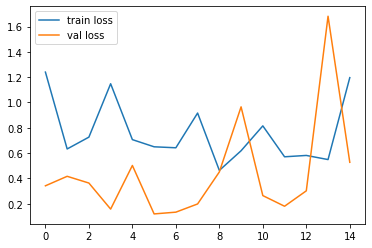

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

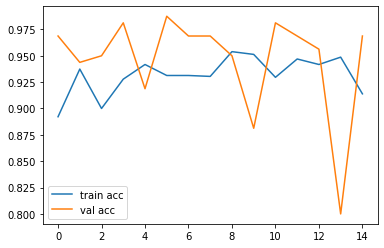

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
model.save('weedinception.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

nmodel=load_model('weedinception.h5')

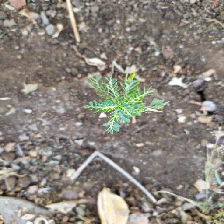

In [20]:
img=image.load_img('/content/drive/MyDrive/weed/test/weed/agri_0_8857.jpeg',target_size=(224,224))
img

In [21]:
x=image.img_to_array(img)
x


array([[[108.,  98.,  89.],
        [ 88.,  77.,  71.],
        [ 66.,  55.,  53.],
        ...,
        [121., 114., 108.],
        [150., 145., 141.],
        [124., 119., 115.]],

       [[ 97.,  87.,  77.],
        [ 78.,  68.,  59.],
        [ 89.,  78.,  74.],
        ...,
        [123., 116., 108.],
        [139., 135., 126.],
        [118., 114., 105.]],

       [[ 81.,  73.,  62.],
        [ 64.,  55.,  46.],
        [ 73.,  64.,  55.],
        ...,
        [123., 117., 105.],
        [129., 125., 113.],
        [121., 118., 103.]],

       ...,

       [[189., 166., 135.],
        [194., 173., 146.],
        [198., 177., 156.],
        ...,
        [101., 105.,  70.],
        [105., 106.,  74.],
        [ 97.,  98.,  67.]],

       [[227., 206., 175.],
        [216., 192., 164.],
        [184., 162., 139.],
        ...,
        [138., 146.,  99.],
        [141., 153., 107.],
        [112., 125.,  81.]],

       [[204., 184., 151.],
        [191., 167., 139.],
        [129., 1

In [22]:
x=x/255
x

array([[[0.42352942, 0.38431373, 0.34901962],
        [0.34509805, 0.3019608 , 0.2784314 ],
        [0.25882354, 0.21568628, 0.20784314],
        ...,
        [0.4745098 , 0.44705883, 0.42352942],
        [0.5882353 , 0.5686275 , 0.5529412 ],
        [0.4862745 , 0.46666667, 0.4509804 ]],

       [[0.38039216, 0.34117648, 0.3019608 ],
        [0.30588236, 0.26666668, 0.23137255],
        [0.34901962, 0.30588236, 0.2901961 ],
        ...,
        [0.48235294, 0.45490196, 0.42352942],
        [0.54509807, 0.5294118 , 0.49411765],
        [0.4627451 , 0.44705883, 0.4117647 ]],

       [[0.31764707, 0.28627452, 0.24313726],
        [0.2509804 , 0.21568628, 0.18039216],
        [0.28627452, 0.2509804 , 0.21568628],
        ...,
        [0.48235294, 0.45882353, 0.4117647 ],
        [0.5058824 , 0.49019608, 0.44313726],
        [0.4745098 , 0.4627451 , 0.40392157]],

       ...,

       [[0.7411765 , 0.6509804 , 0.5294118 ],
        [0.7607843 , 0.6784314 , 0.57254905],
        [0.7764706 , 0

In [23]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [24]:
nmodel.predict(img_data)

array([[0.00491497, 0.99508506]], dtype=float32)

In [25]:
a=np.argmax(nmodel.predict(img_data), axis=1)

In [26]:
a==1

array([ True])